In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_2d = X[:,:2]
X_2d = X_2d[y>0]
y_2d = y[y>0]
y_2d -= 1
print(X_2d.shape)
print(y_2d.shape)

(100, 2)
(100,)


In [4]:
scaler = StandardScaler()
X_2d = scaler.fit_transform(X_2d)
X = scaler.fit_transform(X)

In [5]:
C_range = np.logspace(-2,10,13)
gamma_range = np.logspace(-9,3,13)
param_grid = dict(C=C_range, gamma=gamma_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    cv = cv,
)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [7]:
grid.cv_results_['params']

[{'C': 0.01, 'gamma': 1e-09},
 {'C': 0.01, 'gamma': 1e-08},
 {'C': 0.01, 'gamma': 1e-07},
 {'C': 0.01, 'gamma': 1e-06},
 {'C': 0.01, 'gamma': 1e-05},
 {'C': 0.01, 'gamma': 0.0001},
 {'C': 0.01, 'gamma': 0.001},
 {'C': 0.01, 'gamma': 0.01},
 {'C': 0.01, 'gamma': 0.1},
 {'C': 0.01, 'gamma': 1.0},
 {'C': 0.01, 'gamma': 10.0},
 {'C': 0.01, 'gamma': 100.0},
 {'C': 0.01, 'gamma': 1000.0},
 {'C': 0.1, 'gamma': 1e-09},
 {'C': 0.1, 'gamma': 1e-08},
 {'C': 0.1, 'gamma': 1e-07},
 {'C': 0.1, 'gamma': 1e-06},
 {'C': 0.1, 'gamma': 1e-05},
 {'C': 0.1, 'gamma': 0.0001},
 {'C': 0.1, 'gamma': 0.001},
 {'C': 0.1, 'gamma': 0.01},
 {'C': 0.1, 'gamma': 0.1},
 {'C': 0.1, 'gamma': 1.0},
 {'C': 0.1, 'gamma': 10.0},
 {'C': 0.1, 'gamma': 100.0},
 {'C': 0.1, 'gamma': 1000.0},
 {'C': 1.0, 'gamma': 1e-09},
 {'C': 1.0, 'gamma': 1e-08},
 {'C': 1.0, 'gamma': 1e-07},
 {'C': 1.0, 'gamma': 1e-06},
 {'C': 1.0, 'gamma': 1e-05},
 {'C': 1.0, 'gamma': 0.0001},
 {'C': 1.0, 'gamma': 0.001},
 {'C': 1.0, 'gamma': 0.01},
 {'C': 1.

In [9]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
print(scores.shape)

(13, 13)


In [14]:
class MidpointNormalize(Normalize):    
    def __init__(self,vmin=None, vmax=None, clip=False, midpoint=None):
        self.midpoint=midpoint
        Normalize.__init__(self,vmin, vmax, clip)
        
    def __call__(self,value, clip=None):
        x, y = [self.vmin,self.midpoint,self.vmax],[0,0.5,1]
        return np.ma.masked_array(np.interp(value,x,y))

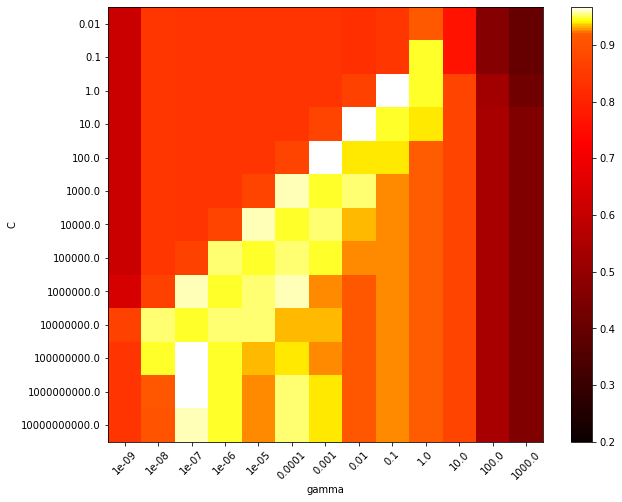

In [18]:
plt.figure(figsize=(10,8))
plt.imshow(
    scores,
    cmap = plt.cm.hot,
    norm = MidpointNormalize(vmin=0.2,midpoint=0.92),
    interpolation = 'nearest',
#     origin='lower'
)
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)),gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)),C_range)
plt.show()

In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.9666666666666668
{'C': 1.0, 'gamma': 0.1}


In [5]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classfiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classfiers.append([clf, C, gamma])

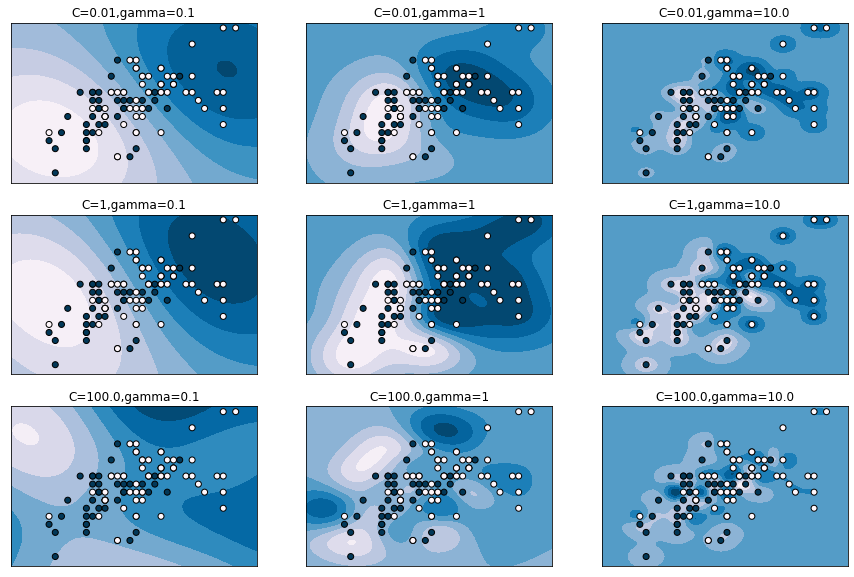

In [13]:
fig = plt.figure(figsize=(15,10))
xx, yy = np.meshgrid(np.linspace(-3,3,200),np.linspace(-3,3,200))
for ix,(clf, C, gamma) in enumerate(classfiers):
    Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    plt.subplot(len(C_2d_range),len(gamma_2d_range),ix+1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu)
    plt.scatter(X_2d[:,0],X_2d[:,1],c=y_2d,cmap=plt.cm.PuBu_r,edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.title(f'C={C},gamma={gamma}')

In [7]:
print(classfiers)

[[SVC(C=0.01, gamma=0.1), 0.01, 0.1], [SVC(C=0.01, gamma=1), 0.01, 1], [SVC(C=0.01, gamma=10.0), 0.01, 10.0], [SVC(C=1, gamma=0.1), 1, 0.1], [SVC(C=1, gamma=1), 1, 1], [SVC(C=1, gamma=10.0), 1, 10.0], [SVC(C=100.0, gamma=0.1), 100.0, 0.1], [SVC(C=100.0, gamma=1), 100.0, 1], [SVC(C=100.0, gamma=10.0), 100.0, 10.0]]
